# 0. Setup Paths

In [1]:
import os

In [54]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [55]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [56]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [57]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
!pip list


Package                 Version
----------------------- ---------
absl-py                 0.12.0
astunparse              1.6.3
backcall                0.2.0
cachetools              4.2.1
certifi                 2020.12.5
chardet                 4.0.0
colorama                0.4.4
decorator               5.0.7
flatbuffers             1.12
gast                    0.3.3
google-auth             1.29.0
google-auth-oauthlib    0.4.4
google-pasta            0.2.0
grpcio                  1.32.0
h5py                    2.10.0
idna                    2.10
importlib-metadata      4.0.1
ipykernel               5.5.3
ipython                 7.22.0
ipython-genutils        0.2.0
jedi                    0.18.0
jupyter-client          6.1.12
jupyter-core            4.7.1
Keras-Preprocessing     1.1.2
lxml                    4.6.3
Markdown                3.3.4
numpy                   1.19.5
oauthlib                3.1.0
opencv-python           4.5.1.48
opt-einsum              3.3.0
parso                

In [6]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [27]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.


zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
zip_safe flag not set; analyzing archive contents...
zip_safe flag not set; analyzing archive contents...
cpuinfo.__pycache__.cpuinfo.cpython-37: module references __file__
cpuinfo.__pycache__.cpuinfo.cpython-37: module MAY be using inspect.stack
cpuinfo.__pycache__.cpuinfo.cpython-37: module MAY be using inspect.trace
zip_safe flag not set; analyzing archive contents...
zip_safe flag not set; analyzing archive contents...
future.backports.test.__pycache__.ssl_servers.cpython-37: module references __file__
future.backports.test.__pycache__.support.cpython-37: module references __file__
future.standard_library.__pycache__.__init__.cpython-37: module references 

        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

Reading https://pypi.org/simple/google-cloud-bigquery/
Best match: google-cloud-bigquery 2.14.0
Processing google_cloud_bigquery-2.14.0-py2.py3-none-any.whl
Installing google_cloud_bigquery-2.14.0-py2.py3-none-any.whl to e:\tensorflow object detection\tfodcourse\third_env\lib\site-packages
writing requirements to e:\tensorflow object detection\tfodcourse\third_env\lib\site-packages\google_cloud_bigquery-2.14.0-py3.7.egg\EGG-INFO\requires.txt
Adding google-cloud-bigquery 2.14.0 to easy-install.pth file

Installed e:\tensorflow object detection\tfodcourse\third_env\lib\site-packages\google_cloud_bigquery-2.14.0-py3.7.egg
Searching for google-api-python-client>=1.6.7
Reading https://pypi.org/simple/google-api-python-client/
Best match: google-api-python-client 2.2.0
Processing google_api_python_client-2.2.0-py2.py3-none-any.whl
Installing google_api_python_client-2.2.0-py2.py3-none-any.whl to e:\tensorflow object detection\tfodcourse\third_env\lib\site-packages
writing requirements to e:\

Obtaining file:///E:/Tensorflow%20Object%20Detection/TFODCourse/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [10]:
!pip install pyyaml 

In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-04-27 10:39:02.626799: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-27 10:39:02.627435: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.7.6: E:\Tensorflow Object Detection\TFODCourse\third_env\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-04-27 10:40:32.015231: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-27 10:40:32.078676: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-04-27 10:40:32.078873: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-04-27 10:40:32.090228: I tensorflow/stream_executor/cuda/cuda_d

I0427 10:40:57.439845  9496 efficientnet_model.py:147] round_filter input=40 output=64
I0427 10:40:57.439845  9496 efficientnet_model.py:147] round_filter input=80 output=128
I0427 10:40:58.394847  9496 efficientnet_model.py:147] round_filter input=80 output=128
I0427 10:40:58.394847  9496 efficientnet_model.py:147] round_filter input=112 output=176
I0427 10:40:59.211883  9496 efficientnet_model.py:147] round_filter input=112 output=176
I0427 10:40:59.212884  9496 efficientnet_model.py:147] round_filter input=192 output=304
I0427 10:41:00.502842  9496 efficientnet_model.py:147] round_filter input=192 output=304
I0427 10:41:00.502842  9496 efficientnet_model.py:147] round_filter input=320 output=512
I0427 10:41:01.053843  9496 efficientnet_model.py:147] round_filter input=1280 output=2048
I0427 10:41:01.140844  9496 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.6, depth_coefficient=2.2, resolution=456, dropout_rate=0.4, blocks=(BlockC

In [ ]:
!pip install tensorflow --upgrade

In [8]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.8
Uninstalling protobuf-3.15.8:
  Successfully uninstalled protobuf-3.15.8


  Using cached protobuf-3.15.8-py2.py3-none-any.whl (173 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'e:\tensorflow object detection\tfodcourse\tfod\scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\vivek\\AppData\\Local\\Temp\\pip-install-n7k1zpmx\\matplotlib_fab7ea7129df438db40b370c6efddc4b\\setup.py'"'"'; __file__='"'"'C:\\Users\\vivek\\AppData\\Local\\Temp\\pip-install-n7k1zpmx\\matplotlib_fab7ea7129df438db40b370c6efddc4b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\vivek\AppData\Local\Temp\pip-wheel-2ecee5uz'
       cwd: C:\Users\vivek\AppData\Local\Temp\pip-install-n7k1zpmx\matplotlib_fab7ea7129df438db40b370c6efddc4b\
  Complete output (583 lines):
  
  Edit setup.cfg to change the build options; suppress output with --qu

  copying lib\matplotlib\backends\backend_wxcairo.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\qt_compat.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\_backend_pdf_ps.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\_backend_tk.py -> build\lib.win-amd64-3.9\matplotlib\backends
  copying lib\matplotlib\backends\__init__.py -> build\lib.win-amd64-3.9\matplotlib\backends
  creating build\lib.win-amd64-3.9\matplotlib\cbook
  copying lib\matplotlib\cbook\deprecation.py -> build\lib.win-amd64-3.9\matplotlib\cbook
  copying lib\matplotlib\cbook\__init__.py -> build\lib.win-amd64-3.9\matplotlib\cbook
  creating build\lib.win-amd64-3.9\matplotlib\compat
  copying lib\matplotlib\compat\__init__.py -> build\lib.win-amd64-3.9\matplotlib\compat
  creating build\lib.win-amd64-3.9\matplotlib\projections
  copying lib\matplotlib\projections\geo.py -> build\lib.win-amd64-3.9\matplotlib\projec

In [8]:
import object_detection

In [9]:
!pip list

Package                 Version   Location
----------------------- --------- -------------------------------------------------------------------------
absl-py                 0.12.0
astunparse              1.6.3
backcall                0.2.0
cachetools              4.2.1
certifi                 2020.12.5
chardet                 4.0.0
colorama                0.4.4
cycler                  0.10.0
decorator               5.0.7
flatbuffers             1.12
gast                    0.3.3
gin-config              0.1.1
google-auth             1.29.0
google-auth-oauthlib    0.4.4
google-pasta            0.2.0
grpcio                  1.32.0
h5py                    2.10.0
idna                    2.10
importlib-metadata      4.0.1
ipykernel               5.5.3
ipython                 7.22.0
ipython-genutils        0.2.0
jedi                    0.18.0
jupyter-client          6.1.12
jupyter-core            4.7.1
Keras-Preprocessing     1.1.2
kiwisolver              1.3.1
lvis                    0.5.3

In [28]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [58]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]


# 2. Create Label Map

In [59]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [60]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [61]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [62]:
!pip install pytz 

In [63]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [64]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [65]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [66]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [67]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [68]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [69]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [70]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [71]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [72]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [73]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --num_train_steps=3000


In [45]:
!{command}

2021-04-27 10:51:47.356925: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-27 10:51:47.356958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-04-27 10:51:56.321228: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-27 10:51:56.322806: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-04-27 10:51:56.322841: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-04-27 10:51:56.327742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-4UI9RSNQ
2021-04-27 10:51:56.327885: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:1

W0427 10:53:02.476431  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.0
W0427 10:53:02.476431  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.1
W0427 10:53:02.476431  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.2
W0427 10:53:02.477430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.3
W0427 10:53:02.477430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.4
W0427 10:53:02.477430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.class_predictions_with_background.0
W0427 10:53:02.477430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predic

W0427 10:53:02.501430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.2.4.moving_mean
W0427 10:53:02.502430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.2.4.moving_variance
W0427 10:53:02.502430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.2.7.axis
W0427 10:53:02.502430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.2.7.gamma
W0427 10:53:02.502430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.2.7.beta
W0427 10:53:02.502430  9268 util.py:161] Unresolved object in checkpoint: (root).model._box_predictor._base_tower_layers_for_heads.box_encodings.2.7.moving_mean
W0427 10:53:02.502430  9268 util.py:161] Unresolve

# 7. Evaluate the Model

In [74]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [75]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned


In [49]:
!{command}

Traceback (most recent call last):
  File "Tensorflow\models\research\object_detection\model_main_tf2.py", line 32, in <module>
    from object_detection import model_lib_v2
  File "C:\Users\vivek\anaconda3\envs\newp37\lib\site-packages\object_detection-0.1-py3.7.egg\object_detection\model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "C:\Users\vivek\anaconda3\envs\newp37\lib\site-packages\object_detection-0.1-py3.7.egg\object_detection\eval_util.py", line 35, in <module>
    from object_detection.metrics import coco_evaluation
  File "C:\Users\vivek\anaconda3\envs\newp37\lib\site-packages\object_detection-0.1-py3.7.egg\object_detection\metrics\coco_evaluation.py", line 25, in <module>
    from object_detection.metrics import coco_tools
  File "C:\Users\vivek\anaconda3\envs\newp37\lib\site-packages\object_detection-0.1-py3.7.egg\object_detection\metrics\coco_tools.py", line 51, in <module>
    from pycocotools import coco
  File "C:\Users\vivek\anac

# 8. Load Train Model From Checkpoint

In [76]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [77]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [78]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [79]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [80]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thumbsdown.7892e33a-a714-11eb-8bc9-d8c49705db0b.jpg')

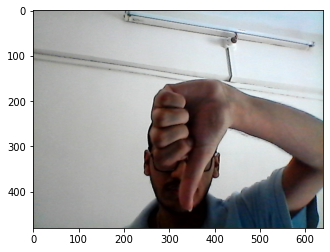

In [81]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [82]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.1.48
Uninstalling opencv-python-headless-4.5.1.48:
  Successfully uninstalled opencv-python-headless-4.5.1.48


In [85]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [46]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [47]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [48]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [49]:
!{command}

2021-04-26 20:14:03.582108: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-26 20:14:03.582148: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-04-26 20:14:08.344827: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-26 20:14:08.346892: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-04-26 20:14:08.346941: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-04-26 20:14:08.352361: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-4UI9RSNQ
2021-04-26 20:14:08.352538: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:1

INFO:tensorflow:Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x000001CEF4269888>, TensorSpec(shape=(None, 40, 40, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x000001CEF4269F88>, TensorSpec(shape=(None, 20, 20, 96), dtype=tf.float32, name='image_features/1/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x000001CEF4269E88>, TensorSpec(shape=(None, 10, 10, 1280), dtype=tf.float32, name='image_features/2/1'))], True), {}).
I0426 20:15:06.752683 13640 def_function.py:1170] Unsupported signature for serialization: (([(<tensorflow.python.framework.func_graph.UnknownArgument object at 0x000001CEF4269888>, TensorSpec(shape=(None, 40, 40, 32), dtype=tf.float32, name='image_features/0/1')), (<tensorflow.python.framework.func_graph.UnknownArgument object at 0x000001CEF4269F88>, TensorSpec(shape=(None, 20, 20, 96), dtype=tf.float32, 

# 11. Conversion to TFJS

In [50]:
!pip install tensorflowjs

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.4.0 requires Cython, which is not installed.
tf-models-official 2.4.0 requires dataclasses, which is not installed.
tf-models-official 2.4.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.4.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.4.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.4.0 requires oauth2client, which is not installed.
tf-models-official 2.4.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.4.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.4.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.4.0 requires sentencepiece, which is not installed.
tf-models-official 2.4.0 requires seqeval, which is not in

In [51]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [52]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [53]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-26 20:18:30.815886: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-26 20:18:30.815923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-04-26 20:18:35.660958: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-26 20:18:35.662528: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-04-26 20:18:35.662558: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-04-26 20:18:35.667624: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-4UI9RSNQ
2021-04-26 20:18:35.667761: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:1

In [54]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [55]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [56]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [57]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [58]:
!{command}

2021-04-26 20:19:53.936468: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-26 20:19:53.936505: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-04-26 20:19:58.062248: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-26 20:19:58.064258: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-04-26 20:19:58.064298: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-04-26 20:19:58.070334: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-4UI9RSNQ
2021-04-26 20:19:58.070479: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:1

W0426 20:20:11.401080 10056 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000002BD73493288>, because it is not built.
W0426 20:20:11.401080 10056 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000002BD734B9AC8>, because it is not built.
W0426 20:20:11.401080 10056 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000002BD734D2308>, because it is not built.
W0426 20:20:11.401080 10056 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000002BD734D2F08>, because it is not built.
W0426 20:20:11.401080 10056 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000002BD734C8208>, because it is not built.
W0426 20:20:11.401080 

In [59]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [60]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [61]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [62]:
!{command}

2021-04-26 20:21:18.398907: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-26 20:21:18.398943: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-04-26 20:21:22.191474: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-26 20:21:22.193029: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-04-26 20:21:22.193059: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-04-26 20:21:22.198294: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-4UI9RSNQ
2021-04-26 20:21:22.198412: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:1

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')